In [238]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Ankita\Downloads\abalone.csv")
data.columns=['gender', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
data.head()

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [239]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['I','F','M'])
data['gender']= le.transform(data['gender'])
data.head()

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [240]:
data.describe()

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,1.052682,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.822208,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [241]:
correlation = data.corr(method='pearson')
correlation

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
gender,1.000000,-0.035915,-0.038762,-0.041796,-0.021219,-0.001205,-0.031873,-0.034686,-0.035076
length,-0.035915,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
diameter,-0.038762,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
height,-0.041796,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
whole_weight,-0.021219,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
shucked_weight,-0.001205,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
viscera_weight,-0.031873,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
shell_weight,-0.034686,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
rings,-0.035076,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FEF5C5C88>,
      dtype=object)

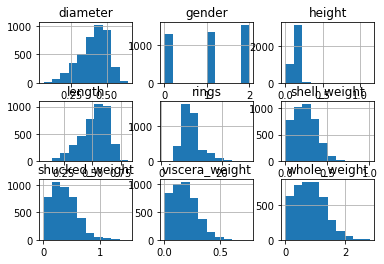

In [242]:
%matplotlib inline
data.hist()

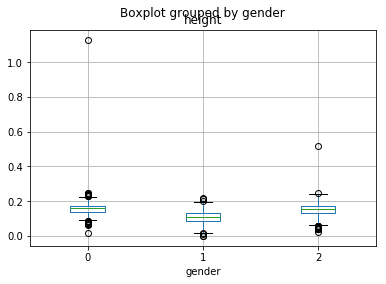

In [244]:
data.boxplot(column='height', by='gender')

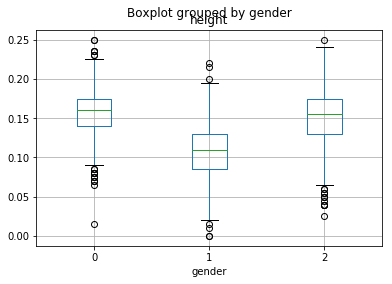

In [245]:
data= data[data['height']<0.5]
data=data[data['shell_weight']<0.8]
data.boxplot(column='height', by='gender')

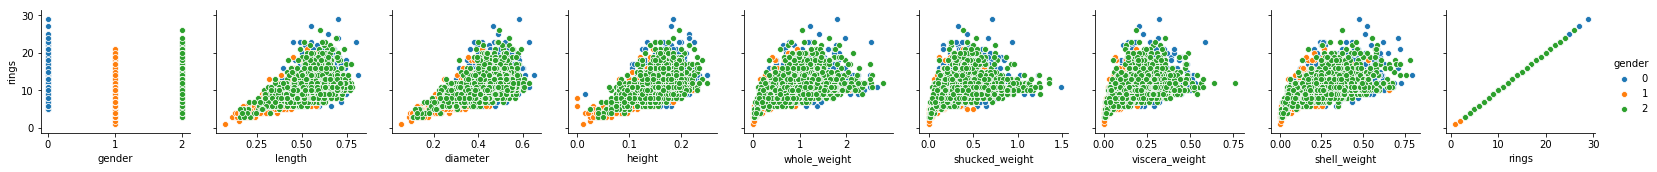

In [247]:
import seaborn as sns
sns.pairplot(data, y_vars=['rings'], x_vars=data.columns, hue='gender')

In [257]:
scaled = data.loc[:,['gender','length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']]
from sklearn.preprocessing import MinMaxScaler
scaled  = MinMaxScaler().fit_transform(scaled)
scaled = pd.DataFrame(scaled)
scaled.columns =['gender','length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
scaled.corr(method='pearson')

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
gender,1.000000,-0.035588,-0.038476,-0.039305,-0.021138,-0.001906,-0.031662,-0.032904,-0.034645
length,-0.035588,1.000000,0.986781,0.899951,0.926278,0.898182,0.902924,0.903491,0.555992
diameter,-0.038476,0.986781,1.000000,0.906115,0.926288,0.893278,0.899577,0.910926,0.573842
height,-0.039305,0.899951,0.906115,1.000000,0.887538,0.836078,0.865365,0.892295,0.608187
whole_weight,-0.021138,0.926278,0.926288,0.887538,1.000000,0.969846,0.966686,0.957316,0.536607
shucked_weight,-0.001906,0.898182,0.893278,0.836078,0.969846,1.000000,0.931891,0.887002,0.418349
viscera_weight,-0.031662,0.902924,0.899577,0.865365,0.966686,0.931891,1.000000,0.911270,0.501262
shell_weight,-0.032904,0.903491,0.910926,0.892295,0.957316,0.887002,0.911270,1.000000,0.623165
rings,-0.034645,0.555992,0.573842,0.608187,0.536607,0.418349,0.501262,0.623165,1.000000


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __nam

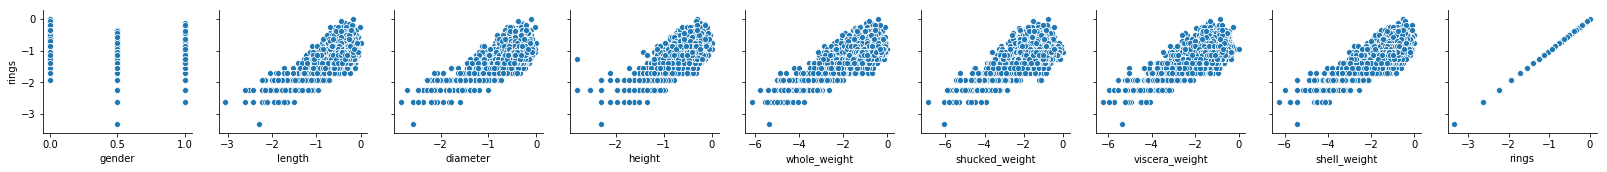

In [258]:
import numpy as np
scaled['length']= np.log(scaled['length'])
scaled['diameter']= np.log(scaled['diameter'])
scaled['height']= np.log(scaled['height'])
scaled['whole_weight'] = np.log(scaled['whole_weight'])
scaled['shucked_weight'] = np.log(scaled['shucked_weight'])
scaled['viscera_weight']= np.log(scaled['viscera_weight'])
scaled['shell_weight']= np.log(scaled['shell_weight'])
scaled['rings']= np.log(scaled['rings'])
sns.pairplot(scaled, y_vars=['rings'], x_vars=scaled.columns)

In [259]:
scaled.drop_duplicates(keep='first', inplace=True)
x= data.drop(['rings'], axis=1)
y=np.log(data['rings'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)


In [260]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)
pred= lr.predict(x_test)

In [261]:
from sklearn.metrics import r2_score, mean_absolute_error as me, mean_squared_error
print("r2_score on linear regression:", r2_score(y_test, pred))
print("mean absolute error on linear regression:", me(y_test, pred))
print("root mean error on linear regression:", mean_squared_error(y_test, pred))

r2_score on linear regression: 0.6114880475780664
mean absolute error on linear regression: 0.16058905784633984
root mean error on linear regression: 0.041721915088725754


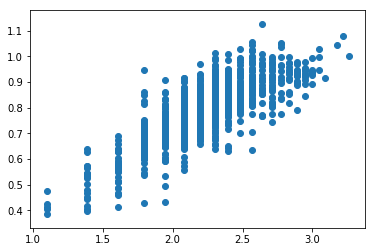

In [262]:
import matplotlib.pyplot as plt
plt.scatter((y_test), np.log(pred))

In [263]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=9, random_state=0,n_estimators=25)
regr.fit(x_train,y_train)
pred=regr.predict(x_test)
pred=np.exp( pred)

y_test=np.exp(y_test)
print("r2_score on Random Forest regression:", r2_score(y_test, pred))
print("mean absolute error on Random Forest regression:", me(y_test, pred))
print("root mean square error on Random Forest regression: ", mean_squared_error(y_test, pred))

r2_score on Random Forest regression: 0.5550799842683571
mean absolute error on Random Forest regression: 1.4953440009432566
root mean square error on Random Forest regression:  4.730485147349959


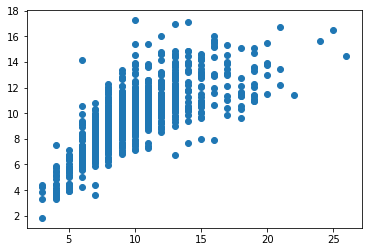

In [264]:
plt.scatter(y_test, pred)